In [150]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [151]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [152]:
df.describe()

,total_experience_years,annual_base_pay
count,1608.000000,1.651000e+03
mean,6.756113,6.325004e+06
std,5.687004,2.461353e+08
min,0.000000,0.000000e+00
25%,3.000000,6.100000e+04
50%,5.000000,9.948000e+04
75%,10.000000,1.300000e+05
max,56.000000,1.000000e+10


In [153]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df = df[(df['total_experience_years'] < 30)]
df.drop(df[df['annual_base_pay']>= 200000].index, inplace=True)

<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

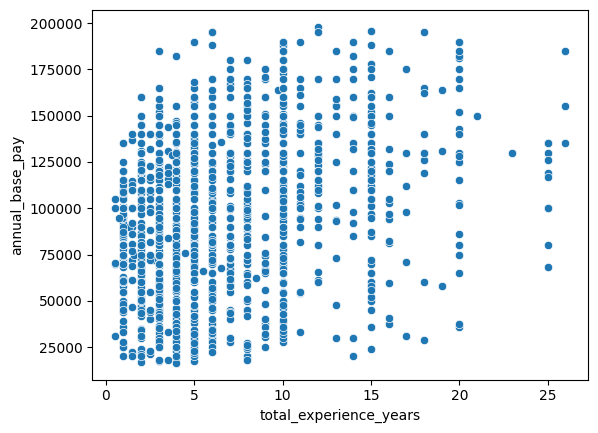

In [154]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [155]:
X = df["total_experience_years"].values
y = df['annual_base_pay'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X))
print(len(X_train))
print(len(y_test))

1374
961
413


In [156]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1),y_train)

LinearRegression()

In [157]:
y_pred = model.predict(X_test.reshape(-1,1))

print(y_test[0])
print(y_pred[0])

46000.0
89441.65952413029


In [158]:
for i in range(5):
    print("Actual: " + str(y_test[i]))
    print("Predicted: "+ str(y_pred[i]))

Actual: 46000.0
Predicted: 89441.65952413029
Actual: 155000.0
Predicted: 89441.65952413029
Actual: 128000.0
Predicted: 103935.42086247349
Actual: 150000.0
Predicted: 99104.16708302575
Actual: 88000.0
Predicted: 82194.77885495867


In [159]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

1556386958.0914483


In [160]:
ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()

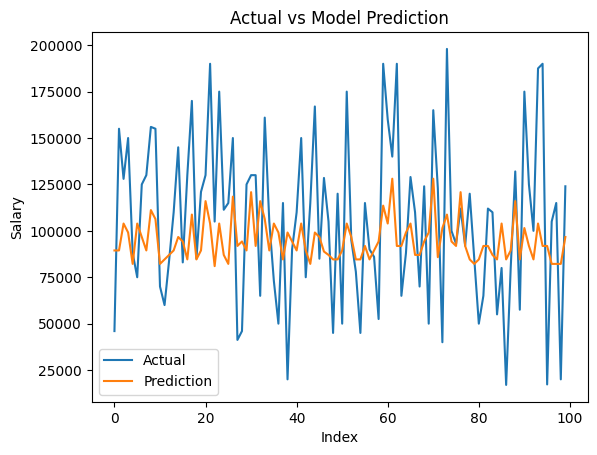

In [161]:
plt.plot([x for x in range(100)], ytest_list[:100], label='Actual')
plt.plot([x for x in range(100)], ypred_list[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()